In [1]:
from ultralytics import YOLOv10
import cv2
import os

In [2]:
model = YOLOv10("yolov10/runs/detect/train2/weights/best.pt")

In [3]:
category_dict = {
    0: 'fire', 1: 'smoke'}

In [4]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

In [5]:
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Error: Failed to capture image.")
        break

    results = model(frame)
    detections = results[0].boxes.data.cpu().numpy()  

    for detection in detections:
        x1, y1, x2, y2, confidence, class_id = detection
        category_id = int(class_id)
        label = category_dict.get(category_id, 'Unknown')
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        label_text = f"{label}: {confidence:.2f}"
        cv2.putText(frame, label_text, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.imshow('YOLOv10 Real-time Object Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 146.6ms
Speed: 5.0ms preprocess, 146.6ms inference, 13.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 98.7ms
Speed: 2.0ms preprocess, 98.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 96.7ms
Speed: 2.0ms preprocess, 96.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 89.8ms
Speed: 1.0ms preprocess, 89.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 93.7ms
Speed: 1.0ms preprocess, 93.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 90.8ms
Speed: 1.0ms preprocess, 90.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 92.7ms
Speed: 1.0ms preprocess, 92.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 91.8ms
Speed: 1.0ms preprocess, 91.8m

In [11]:
def process_webcam():
    cap = cv2.VideoCapture(0)  
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return

    bounding_box_annotator = sv.BoundingBoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)[0]
        detections = sv.Detections.from_ultralytics(results)

        for box, class_id, confidence in zip(detections.xyxy, detections.class_id, detections.confidence):
            class_name = category_dict[class_id]
            cv2.rectangle(frame, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (255, 0, 0), 2)
            cv2.putText(frame, f"{class_name}: {confidence:.2f}", (int(box[0]), int(box[1] - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        cv2.imshow("Webcam", frame)
        if cv2.waitKey(25) & 0xFF == ord("q"):
            break

    cap.release()
    cv2.destroyAllWindows()

In [13]:
process_webcam()

NameError: name 'sv' is not defined

In [9]:
# img_src = "test_images/Fire (61).jpeg"

result = model("Fire (145).jpeg")



image 1/1 E:\JN\Fire (145).jpeg: 480x640 (no detections), 89.8ms
Speed: 3.0ms preprocess, 89.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


In [20]:
import numpy as np
arr = np.array(result)

C:\Users\danud\AppData\Local\Temp\ipykernel_19364\2772823615.py:2: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(arr)


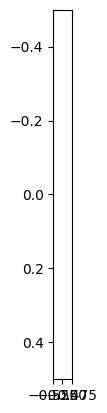

In [21]:

cv2.imshow("w",arr)
